In [1]:
%cd "../"
%pwd

import numpy as np
import matplotlib.pyplot as plt

import io   
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from hybrid_FS import *
from overlap_genes import *
from crossValidation import *

/Users/dormann/Documents/GitHub/src


In [2]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

# Baseline with preselected genes 

In [3]:
#Load preprocess data
D15 = np.array(pd.read_csv ('../data/processed_data/D15.csv'))
y = np.array(D15[:,-1],dtype=int)
D15 = D15[:,0:-1]

In [4]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D15,y)

In [5]:
print(D15.shape, len(pred))
acc = model.score_
print(acc)

(178, 2493) 178
0.9452054794520548


In [6]:
print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (69.0, 4.0, 17.25, 0.7840909090909091, 0.9996157171678355, 0.9452054794520548, 0.9981772831926324, 0.0547945205479452, 0.2159090909090909)


# Mutual information maximizer (MIM)

test 1.0 0.0


/Users/dormann/Documents/GitHub/src/pred_score.py:132: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = TP/FP


TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (88.0, 0.0, inf, 0.9887640449438202, 1.0, 1.0, 0.9998751404669747, 0.0, 0.011235955056179775)


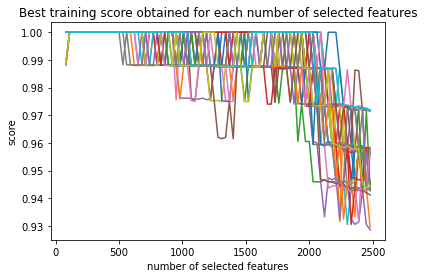

In [7]:
#Define parameters for MIM method
N = np.arange(80,2500,30)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,D15, FamiliesClusters, compute_precision,True, 30,  MIM, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = D15[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Anova F test

test 1.0 0.0


/Users/dormann/Documents/GitHub/src/pred_score.py:132: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = TP/FP


TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (87.0, 0.0, inf, 0.9775280898876404, 1.0, 1.0, 0.9997556207233627, 0.0, 0.02247191011235955)


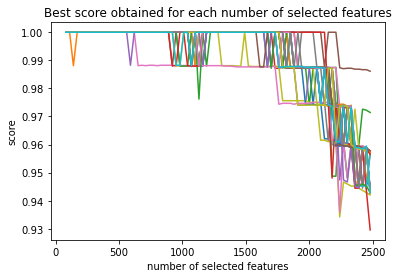

In [8]:
#Define parameters for ANOVA method
N = np.arange(80,2500,30)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,D15, FamiliesClusters, compute_precision,True, 30,  ANOVA, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = D15[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))    

# Hybrid methods

# Mutual information and stimulated annealing

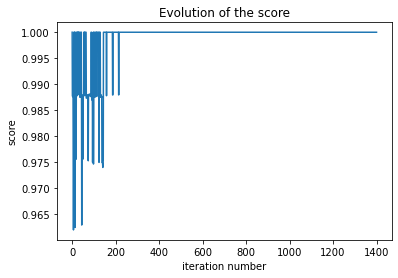

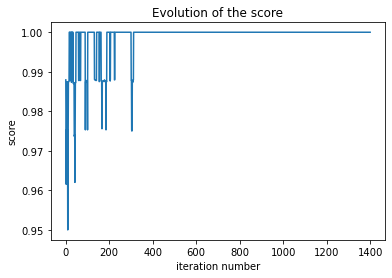

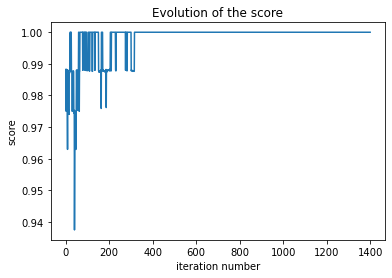

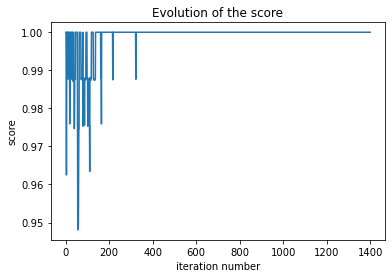

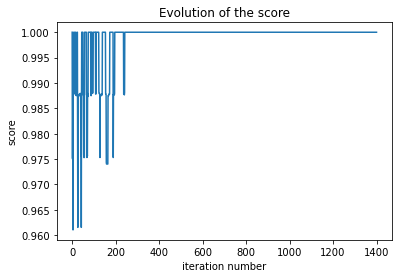

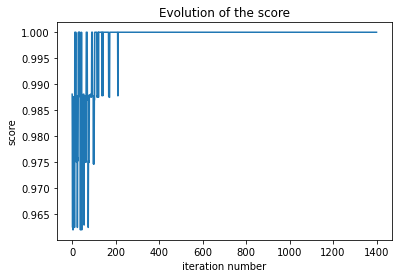

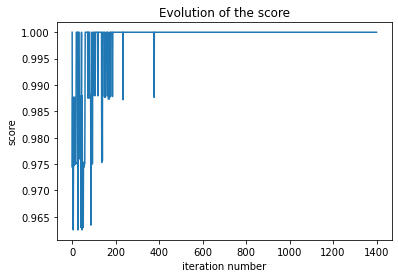

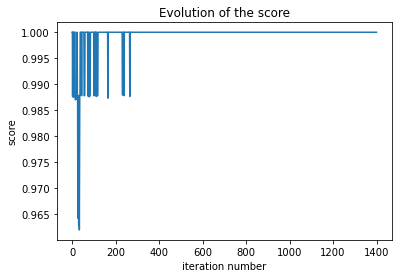

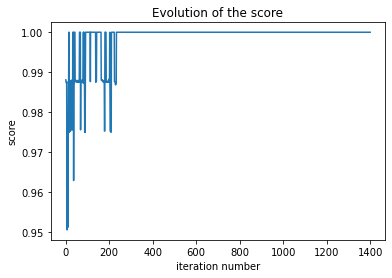

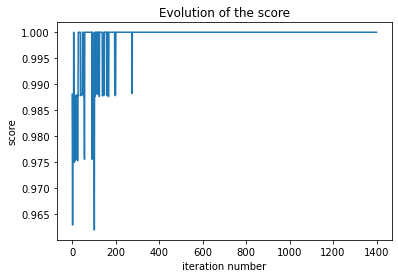

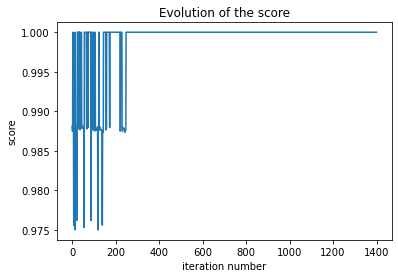

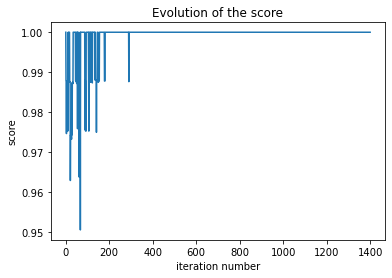

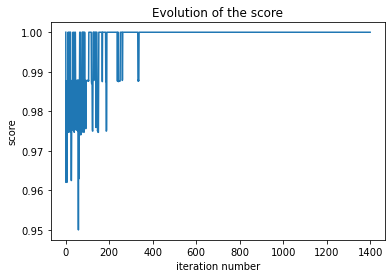

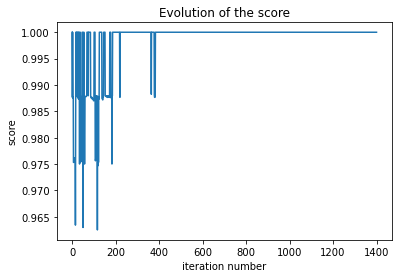

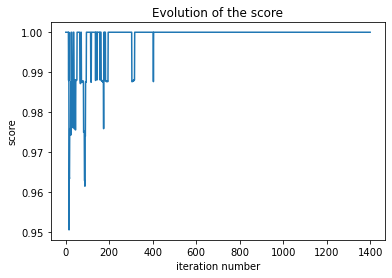

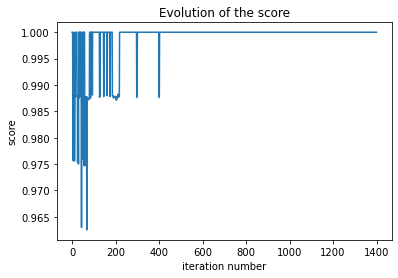

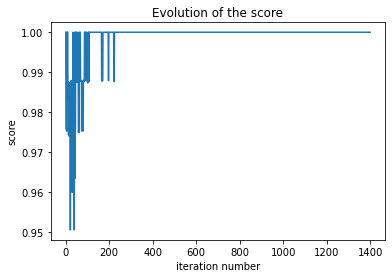

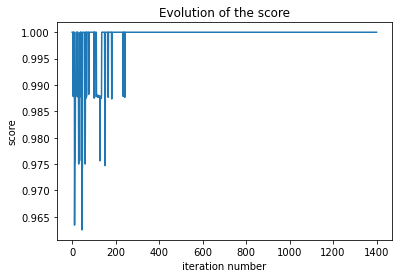

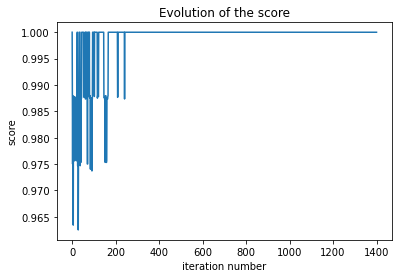

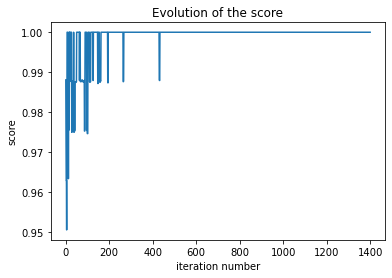

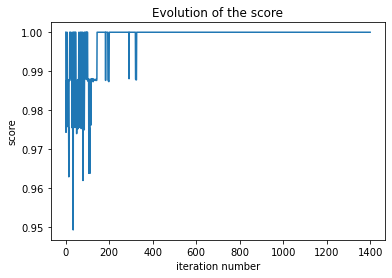

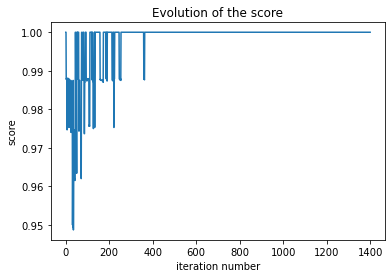

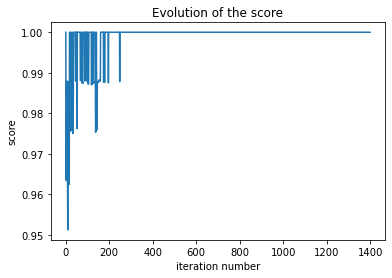

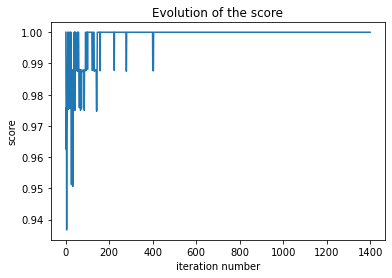

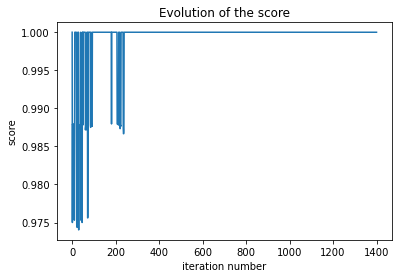

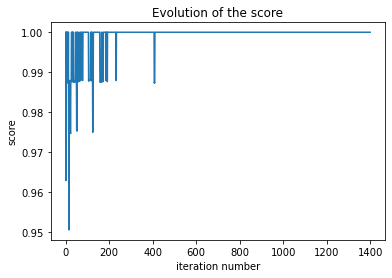

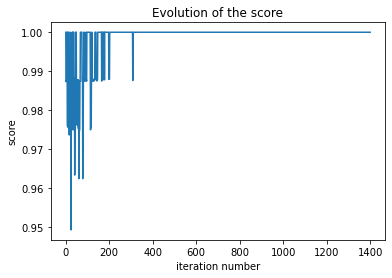

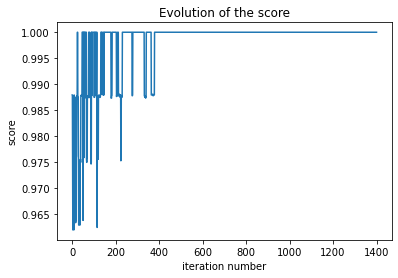

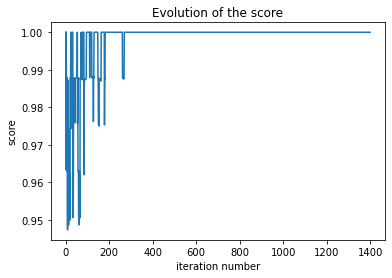

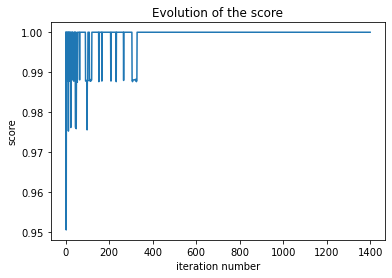

test 1.0 0.0
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (86.0, 0.0, inf, 0.9662921348314607, 1.0, 1.0, 0.9996410195046069, 0.0, 0.033707865168539325)


/Users/dormann/Documents/GitHub/src/pred_score.py:132: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = TP/FP


In [9]:
#Define parameters for MI + stimulated annealing method
N = np.array([800])
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_iter': 1400, 'n_neighbors': 3, 'p_mutate': 0.1, 'c': 1, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,D15, FamiliesClusters, compute_precision,True, 30,  MI_stimulated_annealing, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = D15[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

# Mutual information and genetic feature selection

In [ ]:
#Define parameters for MI + genetic algorithm method
N = np.array([800])                            
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'n_population': 300, 'crossover_proba': 0.5, 'mutation_proba': 0.2, 'n_generations': 120, 'tournament_size': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,D15, FamiliesClusters, compute_precision,True, 30,  MI_genetic_fs, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = D15[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 